In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | bandarbeyla
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | skeldon
Processing Record 5 of Set 1 | tromso
Processing Record 6 of Set 1 | sovetskiy
Processing Record 7 of Set 1 | phan rang
City not found. Skipping...
Processing Record 8 of Set 1 | constantine
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | changli
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | acari
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | hobart
Pr

Processing Record 37 of Set 4 | visnes
Processing Record 38 of Set 4 | port arthur
Processing Record 39 of Set 4 | kawalu
Processing Record 40 of Set 4 | garowe
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | haian
Processing Record 43 of Set 4 | saint anthony
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | kaitangata
Processing Record 46 of Set 4 | atambua
Processing Record 47 of Set 4 | chartres
Processing Record 48 of Set 4 | burica
City not found. Skipping...
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | kayes
Processing Record 1 of Set 5 | tecoanapa
Processing Record 2 of Set 5 | kysyl-syr
Processing Record 3 of Set 5 | new port richey
Processing Record 4 of Set 5 | fort nelson
Processing Record 5 of Set 5 | san andres
Processing Record 6 of Set 5 | pacifica
Processing Record 7 of Set 5 | pavlovka
Processing Record 8 of Set 5 | lagoa
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | r

Processing Record 30 of Set 8 | chuy
Processing Record 31 of Set 8 | gat
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | roma
Processing Record 34 of Set 8 | formosa
Processing Record 35 of Set 8 | carbonia
Processing Record 36 of Set 8 | cuamba
Processing Record 37 of Set 8 | pangnirtung
Processing Record 38 of Set 8 | mayo
Processing Record 39 of Set 8 | kristiansund
Processing Record 40 of Set 8 | evensk
Processing Record 41 of Set 8 | anadyr
Processing Record 42 of Set 8 | west wendover
Processing Record 43 of Set 8 | policoro
Processing Record 44 of Set 8 | tungor
Processing Record 45 of Set 8 | oranjestad
Processing Record 46 of Set 8 | sterling
Processing Record 47 of Set 8 | jurmala
Processing Record 48 of Set 8 | ukiah
Processing Record 49 of Set 8 | pringsewu
Processing Record 50 of Set 8 | namatanai
Processing Record 1 of Set 9 | almaznyy
Processing Record 2 of Set 9 | mosquera
Processing Record 3 of Set 9 | biak
Processing Record 4 of Set 9 | chingirla

Processing Record 18 of Set 12 | krutinka
Processing Record 19 of Set 12 | hurricane
Processing Record 20 of Set 12 | son la
Processing Record 21 of Set 12 | sao joao da barra
Processing Record 22 of Set 12 | mocuba
Processing Record 23 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 24 of Set 12 | tawkar
City not found. Skipping...
Processing Record 25 of Set 12 | uray
Processing Record 26 of Set 12 | armizonskoye
Processing Record 27 of Set 12 | jacareacanga
Processing Record 28 of Set 12 | clearwater
Processing Record 29 of Set 12 | hereford
Processing Record 30 of Set 12 | ryotsu
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | port-cartier
Processing Record 33 of Set 12 | portland
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | narrabri
Processing Record 36 of Set 12 | irbit
Processing Record 37 of Set 12 | paamiut
Processing Record 38 of Set 12 | mandalgovi
Processing Record 39 of Set 12 | oistins
Processing Record

In [12]:
 print(len(city_data))

586


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,83.14,78,26,13.58,KI,2021-05-31 02:37:15
1,Bandarbeyla,9.4942,50.8122,78.44,82,91,22.21,SO,2021-05-31 02:37:16
2,Cape Town,-33.9258,18.4232,56.08,91,75,7.38,ZA,2021-05-31 02:34:50
3,Skeldon,5.8833,-57.1333,75.43,95,100,3.65,GY,2021-05-31 02:37:16
4,Tromso,69.6496,18.9570,45.25,95,100,3.00,NO,2021-05-31 02:37:16
5,Sovetskiy,61.3614,63.5842,45.97,61,97,6.89,RU,2021-05-31 02:37:17
6,Constantine,36.3650,6.6147,60.21,77,0,2.30,DZ,2021-05-31 02:37:17
7,Lompoc,34.6391,-120.4579,68.14,84,1,10.36,US,2021-05-31 02:37:18
8,Bredasdorp,-34.5322,20.0403,49.32,93,100,4.29,ZA,2021-05-31 02:37:18
9,Qaanaaq,77.4840,-69.3632,29.53,93,100,4.47,GL,2021-05-31 02:37:18


In [14]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-05-31 02:37:15,3.0707,172.7902,83.14,78,26,13.58
1,Bandarbeyla,SO,2021-05-31 02:37:16,9.4942,50.8122,78.44,82,91,22.21
2,Cape Town,ZA,2021-05-31 02:34:50,-33.9258,18.4232,56.08,91,75,7.38
3,Skeldon,GY,2021-05-31 02:37:16,5.8833,-57.1333,75.43,95,100,3.65
4,Tromso,NO,2021-05-31 02:37:16,69.6496,18.9570,45.25,95,100,3.00
5,Sovetskiy,RU,2021-05-31 02:37:17,61.3614,63.5842,45.97,61,97,6.89
6,Constantine,DZ,2021-05-31 02:37:17,36.3650,6.6147,60.21,77,0,2.30
7,Lompoc,US,2021-05-31 02:37:18,34.6391,-120.4579,68.14,84,1,10.36
8,Bredasdorp,ZA,2021-05-31 02:37:18,-34.5322,20.0403,49.32,93,100,4.29
9,Qaanaaq,GL,2021-05-31 02:37:18,77.4840,-69.3632,29.53,93,100,4.47


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

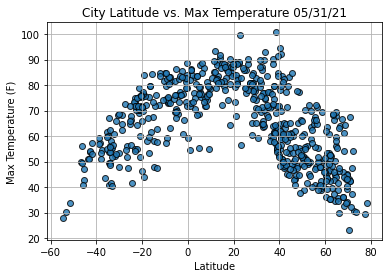

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

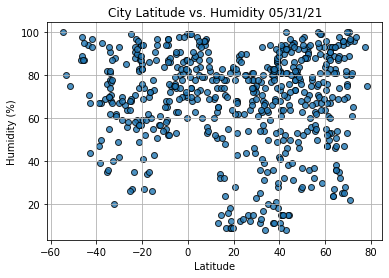

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

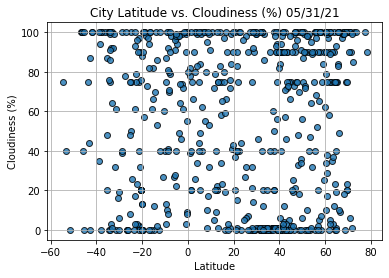

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

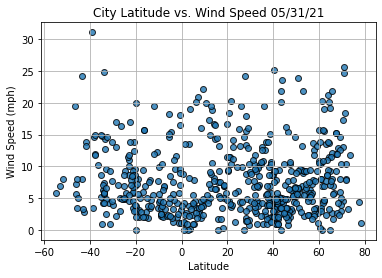

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                      Changli
Country                        CN
Date          2021-05-31 02:37:19
Lat                       39.7042
Lng                       119.151
Max Temp                    71.94
Humidity                       42
Cloudiness                     90
Wind Speed                   8.68
Name: 13, dtype: object

In [23]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

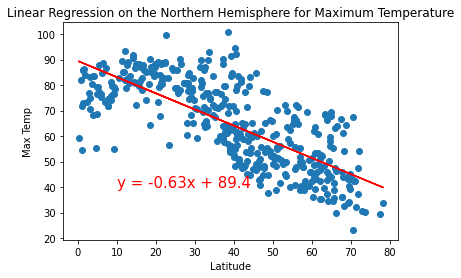

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere for Maximum Temperature")
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


In [27]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.7491865908530718


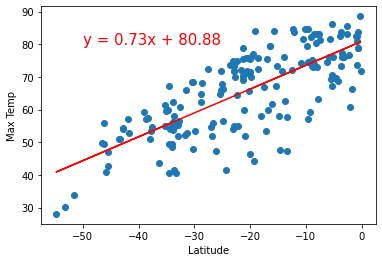

In [28]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))


In [29]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.7504486704263741


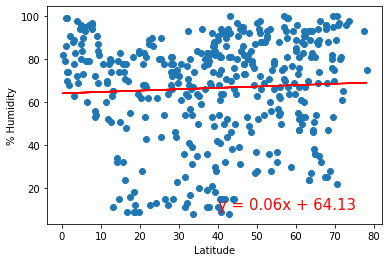

0.051583398748014486


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

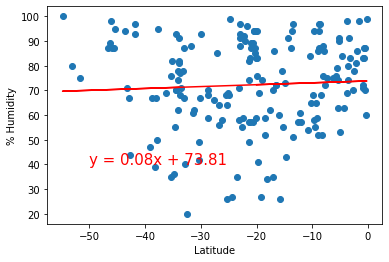

0.055248963653117274


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

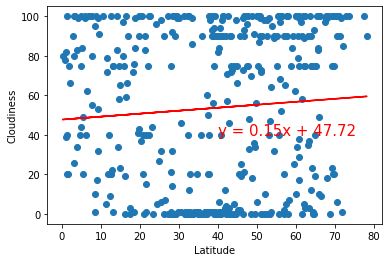

0.07411101103662968


In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

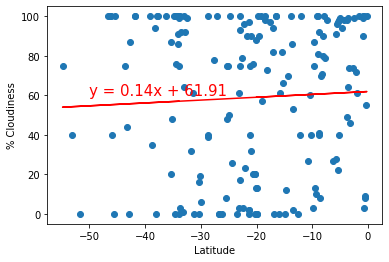

0.04980707831489944


In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

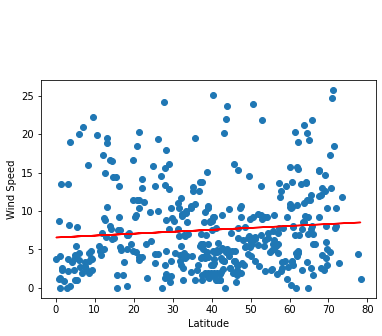

0.09077335373633887


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)